# Police Shootings in the United States

#### Police shootings have been a hot button issue in the United States as of late. Questions regarding the legitimacy of force used are consistently being raised. My aim for this project is not to discredit any method of force used by our men and women in blue, but rather take a look at what story the numbers do tell us. Throughout my exploration of the data set, I remained as impartial as any human being could. 

##### The data set was from Kaggle.com and was updated about 7 months ago. It consists of 14 different columns, of all differing variable types. Variables such as whether or not a victim was armed, to their age, race, and gender are some of the variables that would be used to answer some difficult questions. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("libraries imported")

libraries imported


In [2]:
# Import dataset

import types

from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_aa0682dac2ea46708a76c09ecac60e99 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5rQJ6i3UHx1vz46SUwPsdEMNtQU8N-AKaCgJu11P1kwA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_aa0682dac2ea46708a76c09ecac60e99.get_object(Bucket='policeshootings-donotdelete-pr-vhbbvkuhcxm0vr',Key='police shootings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

shootings = pd.read_csv(body)



In [3]:
# View first few rows of dataset
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# Data Cleaning and Exploratory Data Analysis

### In this section we will look at the "cleanliness" of the data set. We will perform some standard exploratory data analysis by looking at the variable types, checking for missing values, check the shape of the data, and some other routine tasks. 

In [4]:
# View the shape of the dataset
shootings.shape

(4895, 15)

In [5]:
# Check the types of data in each column
shootings.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [6]:
# Check for missing values
shootings.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [7]:
# Check distinct values for flee column
shootings.flee.unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

In [8]:
# Convert object types to strings where applicable
shootings['date'] = shootings['date'].astype(str)
shootings['name'] = shootings['name'].astype(str)
shootings['manner_of_death'] = shootings['manner_of_death'].astype(str)
shootings['armed'] = shootings['armed'].astype(str)
shootings['race'] = shootings['race'].astype(str)
shootings['city'] = shootings['city'].astype(str)
shootings['state'] = shootings['state'].astype(str)
shootings['threat_level'] = shootings['threat_level'].astype(str)
shootings['arms_category'] = shootings['arms_category'].astype(str)
shootings['flee'] = shootings['flee'].astype(str)

#Convert the new strings to datetimes
shootings['date'] = shootings['date']=pd.to_datetime(shootings['date'])

#Convert age to integer
shootings['age'] = shootings['age'].astype(int)

#Convert flee to boolean
shootings.loc[(shootings.flee == "Not fleeing"),'flee'] = 'False'
shootings.loc[(shootings.flee == "Car"),'flee'] = 'True'
shootings.loc[(shootings.flee == "Foot"),'flee'] = 'True'
shootings.loc[(shootings.flee == "Other"), 'flee'] = 'True'
shootings['flee'] = shootings['flee'].astype(str)
shootings['flee'] = shootings.replace({'flee':{'True': True, 'False': False}})


# Dates and Number of Shootings

### In this section I was curious as to see how many shootings occurred per year and per month. 

In [9]:
# What year had the most shootings?
shootings['date'].dt.year.value_counts()

2015    965
2017    906
2016    904
2018    888
2019    858
2020    374
Name: date, dtype: int64

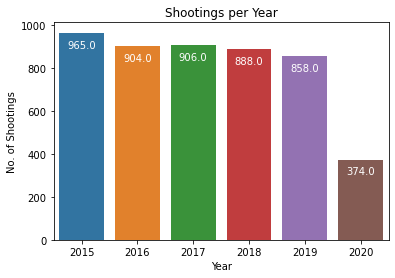

In [10]:
# Graphically display years and instances of shootings
ax = sns.countplot(x = shootings['date'].dt.year, data = shootings)
ax.set(xlabel = 'Year', ylabel = 'No. of Shootings', title = 'Shootings per Year')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='white', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.show()

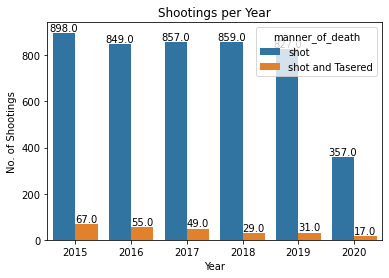

In [11]:
# Graphically display years and shootings with manner of death (ie, shot or tasered and shot)
ax = sns.countplot(x = shootings['date'].dt.year, data = shootings, hue = 'manner_of_death')
ax.set(xlabel = 'Year', ylabel = 'No. of Shootings', title = 'Shootings per Year')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0,5), 
                   textcoords = 'offset points')
    
plt.show()

In [12]:
# Find the average number of shootings per year
count = shootings['date'].count()
avg_shootings_per_year = count/5
print('The average number of shootings per year is', avg_shootings_per_year)

The average number of shootings per year is 979.0


In [13]:
# What month had the most shootings?
shootings['date'].dt.month.value_counts()

1     505
3     503
2     462
4     430
5     418
7     413
6     399
8     371
10    367
11    354
12    345
9     328
Name: date, dtype: int64

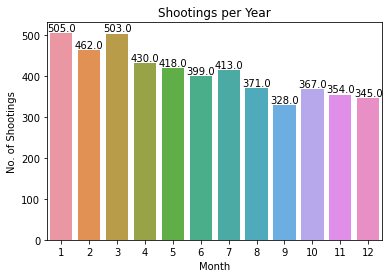

In [14]:
# Graphically display the number of shootings per month
ax = sns.countplot(x = shootings['date'].dt.month, data = shootings)
ax.set(xlabel = 'Month', ylabel = 'No. of Shootings', title = 'Shootings per Year')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
    
plt.show()

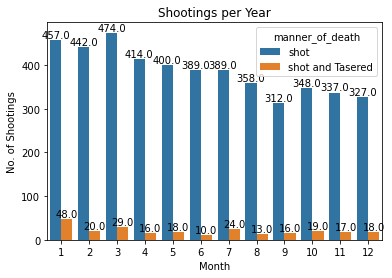

In [15]:
# Graphically display months and shootings with manner of death

ax = sns.countplot(x = shootings['date'].dt.month, data = shootings, hue = 'manner_of_death')
ax.set(xlabel = 'Month', ylabel = 'No. of Shootings', title = 'Shootings per Year')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
    
plt.show()

In [16]:
# Find the average number of shootings per month
count_month = shootings['date'].count()
avg_shootings_per_month = round(count_month/(5*12),2)
print('The average number of shootings per month is', avg_shootings_per_month)

The average number of shootings per month is 81.58


In [17]:
# Find the average number of shootings per day
count_day = shootings['date'].count()
avg_shootings_per_day = round(count_day/(5*365),2)
print('The average number of shootings per day is', avg_shootings_per_day)

The average number of shootings per day is 2.68


# Geographical Questions

### In this section I was curious as to see which cities and states had the most shootings

In [18]:
# What city did a majority of shootings occur
shootings['city'].value_counts()

Los Angeles       78
Phoenix           66
Houston           51
Las Vegas         41
San Antonio       40
                  ..
Clarkesville       1
Inman              1
Neshoba County     1
Round Rock         1
Naschitti          1
Name: city, Length: 2288, dtype: int64

In [19]:
# What state had the most shootings
shootings['state'].value_counts()

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
AL     95
PA     95
NM     93
VA     92
IN     91
NY     90
WI     88
KY     87
NV     85
SC     80
MD     77
OR     76
AR     73
MI     71
MS     61
NJ     60
MN     60
UT     58
KS     49
WV     46
ID     37
AK     36
MA     33
IA     31
HI     29
MT     29
NE     24
ME     21
CT     20
SD     14
DC     13
WY     13
NH     12
ND     11
DE     10
VT      8
RI      4
Name: state, dtype: int64

# Demographic Questions

### In this section I took a look at a variety of demographic questions regarding a victims, age, race, gender, and whether or not a victim displayed any indication of mental illness. I also wanted to see if these shootings occurred while officers were wearing body cameras.

## Age

In [20]:
# What ages were most involved in a majority of police shootings
shootings['age'].value_counts()

37    222
25    176
31    174
27    165
33    164
     ... 
13      1
81      1
78      1
79      1
12      1
Name: age, Length: 75, dtype: int64

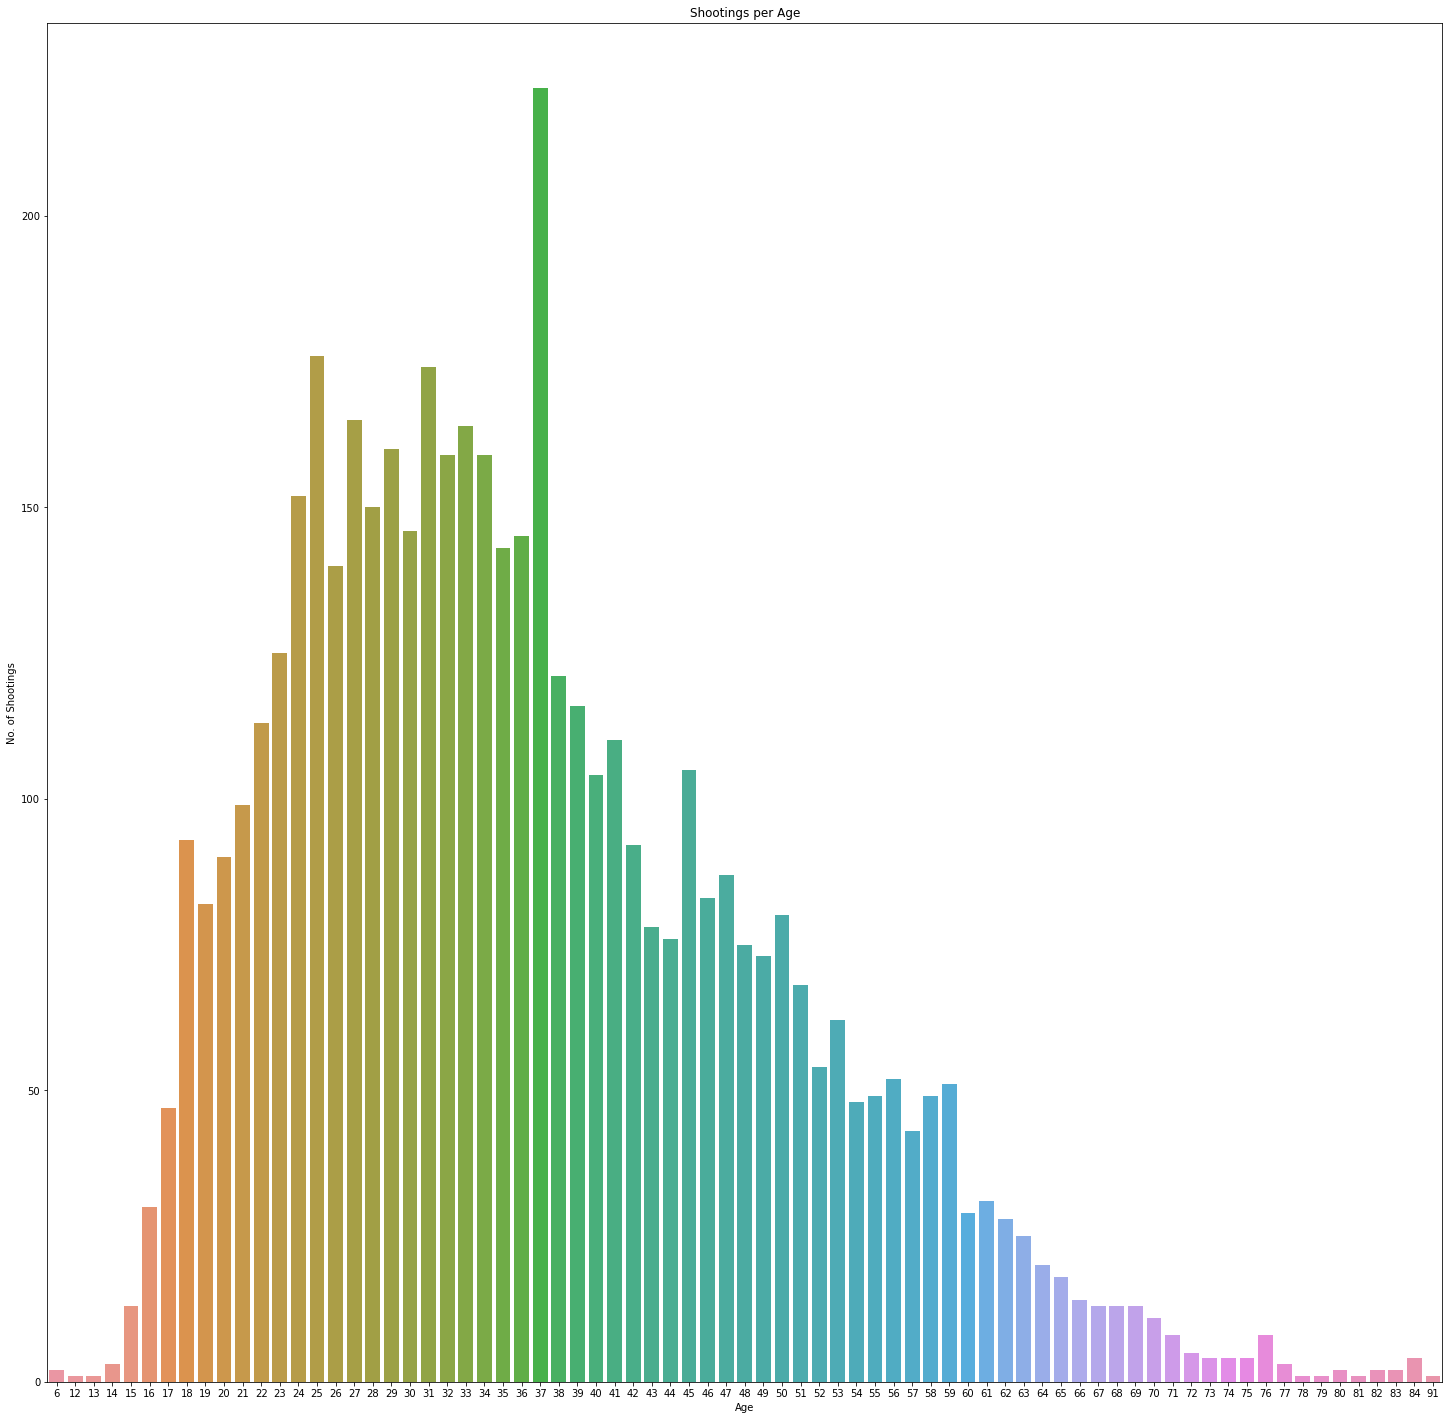

In [21]:
# Graphically visualize the age shootings
fig_dims = (25,25)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x='age', data=shootings, ax = ax)
ax.set(xlabel = 'Age', ylabel = 'No. of Shootings', title = 'Shootings per Age')
plt.show()

In [22]:
# Find the average age of a police shooting
average_age = round(np.mean(shootings['age']),0)
print('The average age of a police shooting is', average_age)

The average age of a police shooting is 37.0


## Race

In [23]:
# What race was involved in a majority of police shootings
shootings['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

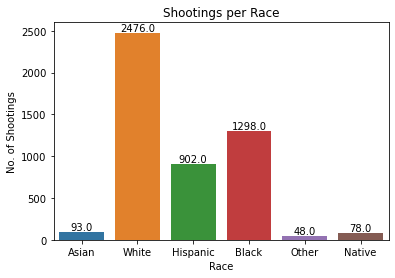

In [24]:
# Graphically visualize the race and shootings
ax = sns.countplot(x = 'race', data = shootings)
ax.set(xlabel = 'Race', ylabel = 'No. of Shootings', title = 'Shootings per Race')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

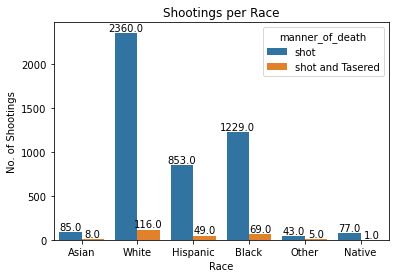

In [25]:
# Graphically visualize the race and shootings with manner of death
ax = sns.countplot(x = 'race', data = shootings, hue = 'manner_of_death')
ax.set(xlabel = 'Race', ylabel = 'No. of Shootings', title = 'Shootings per Race')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

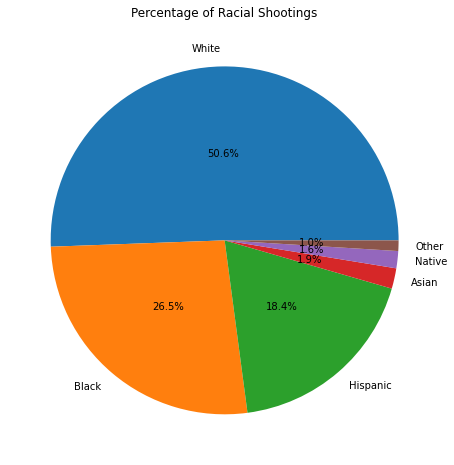

In [26]:
# View the proportion of racial shootings
races = shootings['race'].value_counts()
pie, ax = plt.subplots(figsize = [8,8])
plt.pie(x = races, autopct = '%.1f%%', labels = races.keys(), pctdistance = 0.5)
plt.title('Percentage of Racial Shootings')
plt.show()

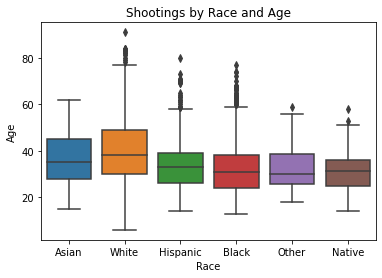

In [27]:
# Graphically view racial shootings by age 
sns.boxplot(x = shootings['race'], y = shootings['age'],dodge = False)
plt.title('Shootings by Race and Age')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()

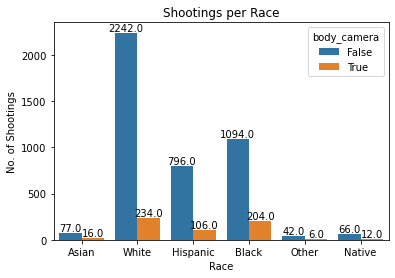

In [28]:
# See if there was a difference in race shootings and body cameras
ax = sns.countplot(x = 'race', data = shootings, hue = 'body_camera')
ax.set(xlabel = 'Race', ylabel = 'No. of Shootings', title = 'Shootings per Race')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

## Mental Illness

In [29]:
# How many instances of mental illness resulted in shootings
shootings['signs_of_mental_illness'].value_counts()

False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64

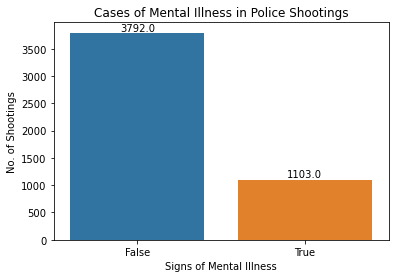

In [30]:
# Graphically display instances of mental illness involved in shootings
ax = sns.countplot(x = 'signs_of_mental_illness', data = shootings)
ax.set(xlabel = 'Signs of Mental Illness', ylabel = 'No. of Shootings', title = 'Cases of Mental Illness in Police Shootings')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

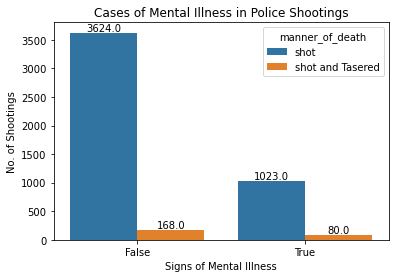

In [31]:
# Graphically display instances of mental illness involved in shootings with manner of death
ax = sns.countplot(x = 'signs_of_mental_illness', data = shootings, hue = 'manner_of_death')
ax.set(xlabel = 'Signs of Mental Illness', ylabel = 'No. of Shootings', title = 'Cases of Mental Illness in Police Shootings')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

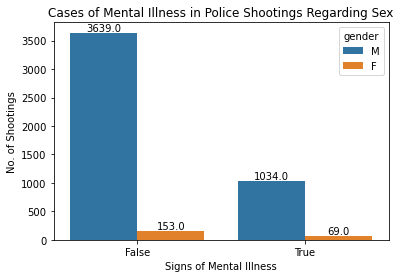

In [32]:
# Graphically display instances of mental illness and sex
ax = sns.countplot(x = 'signs_of_mental_illness', data = shootings, hue = 'gender')
ax.set(xlabel = 'Signs of Mental Illness', ylabel = 'No. of Shootings', title = 'Cases of Mental Illness in Police Shootings Regarding Sex')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

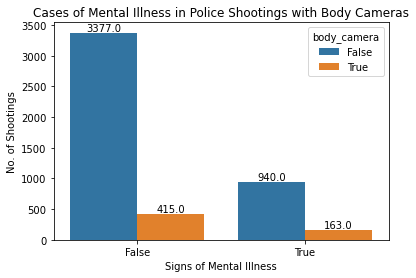

In [33]:
# Graphically display instances of mental health shootings and body cameras
ax = sns.countplot(x = 'signs_of_mental_illness', data = shootings, hue = 'body_camera')
ax.set(xlabel = 'Signs of Mental Illness', ylabel = 'No. of Shootings', title = 'Cases of Mental Illness in Police Shootings with Body Cameras')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

## Body Cameras

In [34]:
# How many instances of officers wearing body cameras were involved in police shootings
shootings['body_camera'].value_counts()

False    4317
True      578
Name: body_camera, dtype: int64

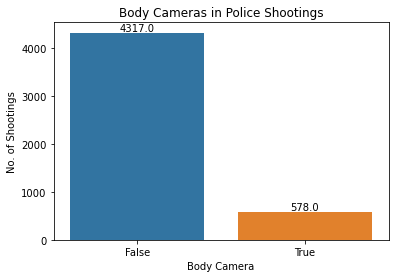

In [35]:
# Graphically display number of officers wearing body cameras during a shooting
ax = sns.countplot(x = 'body_camera', data = shootings)
ax.set(xlabel = 'Body Camera', ylabel = 'No. of Shootings', title = 'Body Cameras in Police Shootings')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

## Sex/Gender

In [36]:
# What sex was most involved in a majority of police shootings
shootings['gender'].value_counts()

M    4673
F     222
Name: gender, dtype: int64

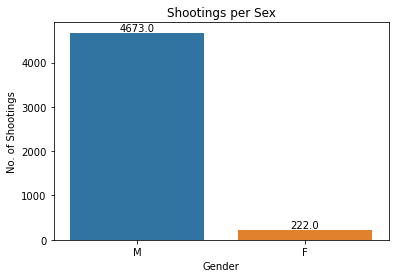

In [37]:
# See if there was a difference in sex shootings 
ax = sns.countplot(x = 'gender', data = shootings)
ax.set(xlabel = 'Gender', ylabel = 'No. of Shootings', title = 'Shootings per Sex')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

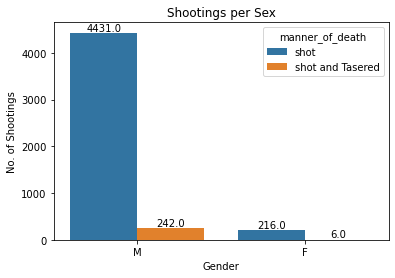

In [38]:
# See if there was a difference in sex shootings and manner of death

ax = sns.countplot(x = 'gender', data = shootings, hue = 'manner_of_death')
ax.set(xlabel = 'Gender', ylabel = 'No. of Shootings', title = 'Shootings per Sex')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

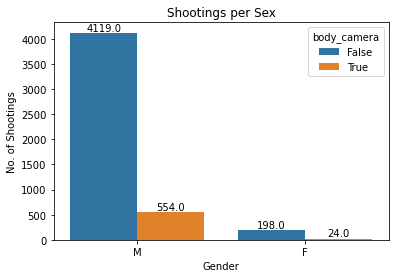

In [39]:
# See if there was a difference in sex shootings and body cameras
ax = sns.countplot(x = 'gender', data = shootings, hue = 'body_camera')
ax.set(xlabel = 'Gender', ylabel = 'No. of Shootings', title = 'Shootings per Sex')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

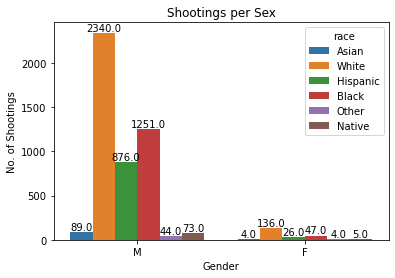

In [40]:
# See if there was a difference in sex shootings and body cameras
ax = sns.countplot(x = 'gender', data = shootings, hue = 'race')
ax.set(xlabel = 'Gender', ylabel = 'No. of Shootings', title = 'Shootings per Sex')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

# Weaponry Questions

### In this section my goal was to look at the types of weapons, if any, the victims were armed with. 

In [41]:
# What was the majority of weapon category for police shootings
shootings['arms_category'].value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

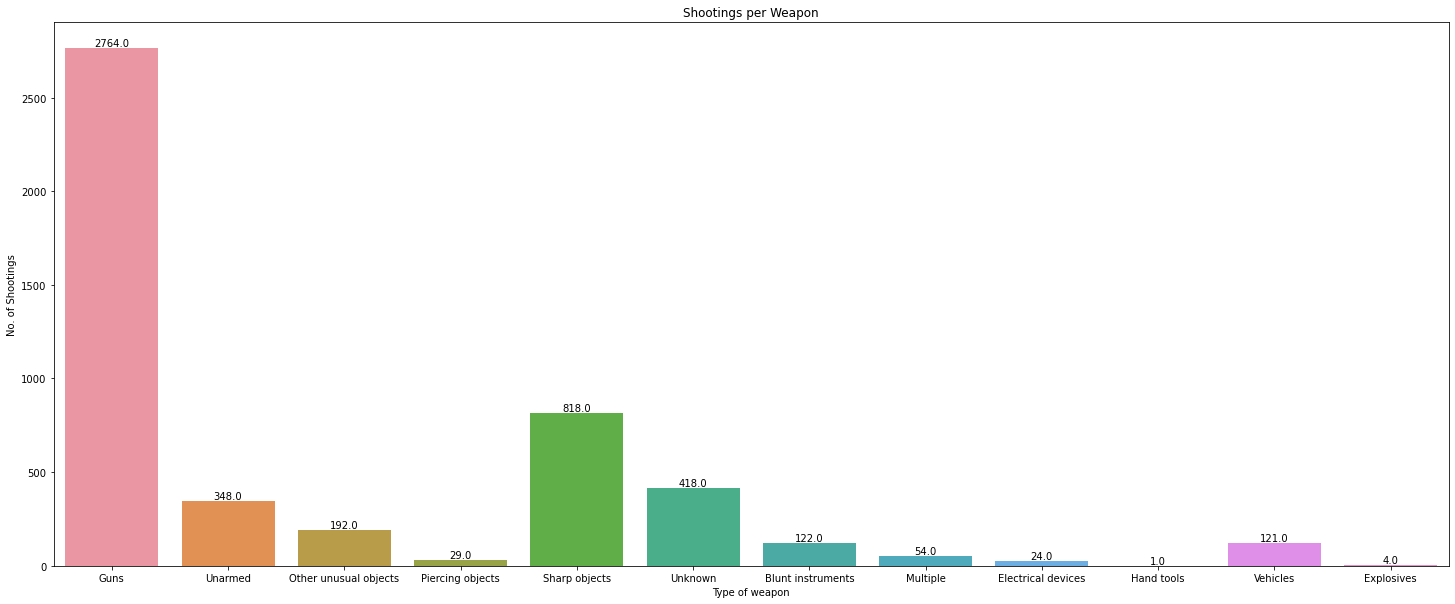

In [42]:
# Graphically visualize the arms category involved in police shootings
fig_dims = (25,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x = 'arms_category', data = shootings)
ax.set(xlabel = 'Type of weapon' , ylabel = 'No. of Shootings', title = 'Shootings per Weapon')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

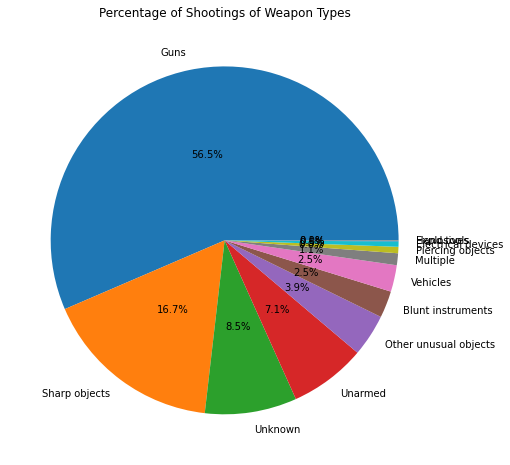

In [43]:
# View proportion of weapon types
weapon_types = shootings['arms_category'].value_counts()
pie, ax = plt.subplots(figsize = [8,8])
plt.pie(x = weapon_types, autopct = '%.1f%%', labels = weapon_types.keys(), pctdistance = .5)
plt.title('Percentage of Shootings of Weapon Types')
plt.show()

# Statistical Analyses

### Visualizing the data is all well and good. However, without performing statistically significant tests, it is difficult to determine if there is indeed a difference among some of the groups we analyzed.

In [61]:
# Import statistical library

import scipy.stats as stats
import statsmodels.api as sm
print('library imported')

library imported


In [60]:
# Determine if there is a statistically significant difference between races who were victims of police shootings
fvalue, pvalue = stats.f_twoway(shootings['race'],shootings['age'])
print(pvalue)


AttributeError: module 'scipy.stats' has no attribute 'f_twoway'